In [1]:
import numpy as np
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics,ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import random
import csv
import pickle
from sklearn.preprocessing import StandardScaler
random.seed(123)
#pd.set_option("display.max_columns", None)
from sklearn.preprocessing import LabelEncoder
from sklearn import svm 

In [3]:
import os, time, glob, socket,random,csv,pickle
import pandas as pd

from timeit import Timer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA 

pd.set_option("display.max_columns", None)
os.getcwd()
os.chdir(r'E:/fintech/')
path=os.getcwd()
import re

In [61]:
# A

y_train=pd.read_csv(path+'/grade/A/y_trainA.csv',index_col=0)
y_test=pd.read_csv(path+'/grade/A/y_testA.csv',index_col=0)
X_test=pd.read_csv(path+'/grade/A/X_testA.csv',index_col=0)
X_train=pd.read_csv(path+'/grade/A/X_trainA.csv',index_col=0)

X_test.drop(columns=['Unnamed: 0.1'])

# 處理 y
le = LabelEncoder()
le.fit(y_train['loan_status'].unique())  
y_train['ans']=le.transform(y_train['loan_status'])


# 分 train0 test0
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


#drop id

X_train0.drop(columns=['Unnamed: 0.1'])
X_test0.drop(columns=['Unnamed: 0.1'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,application_type_Joint App,debt_settlement_flag_Y,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_unknown,hardship_flag_Y,hardship_flag_unknown,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,term_ 60 months,verification_status_Source Verified,verification_status_Verified,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5
355572,-1.386529,1.594769,3.679284,-1.594757,2.914791,0.647527,-1.275720,-0.334794,0.361977,0.182261,-0.751956,-0.132420,0.860374,0.312049,-0.081361,-0.039303,-0.676422,-0.153956,0.393772,0.308560,-0.363818,0.143076,0.032567,0.868100,-0.765523,0.182777,-0.107736,0.365163,-0.488391,0.174497,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
455051,-1.724951,-2.659901,1.709478,1.221454,-1.045363,0.279910,1.927480,-1.977643,0.391131,-1.021208,0.032029,-1.192161,0.038271,0.512696,-0.713553,2.948280,-1.165396,0.279448,-1.293537,-0.441885,0.334288,-0.204016,-1.120690,-1.724666,0.698708,0.332727,-0.045701,-0.551973,-0.787537,1.282898,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
28941,0.698955,-4.898828,1.343780,1.843451,-1.522123,-1.928306,0.391880,3.369269,-1.480316,0.583199,1.956211,1.531663,-2.771938,-0.562944,0.700803,-1.986870,0.415753,-0.748574,0.591916,-0.594948,0.240816,-0.502296,1.233645,-1.572648,-0.707590,0.794113,0.028599,-0.638746,-0.133190,0.381808,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45505,-0.009095,3.040054,1.361589,-1.598080,-0.835454,0.837395,-1.749118,-0.501119,-0.402981,-0.168256,-1.393497,-1.433006,1.212695,1.247624,-0.210841,-0.499343,-0.051464,0.498354,-0.233138,0.253332,0.128360,0.311954,-0.007618,0.967754,1.351458,-0.493479,0.164072,-1.177697,-0.542269,-0.762116,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
108828,6.894067,1.145043,5.136304,-2.260747,-0.191051,2.407914,-1.306160,0.724674,-0.510698,-0.218448,-0.830717,-0.601330,-0.876477,-0.332449,0.402192,-1.285137,0.541220,0.629318,-0.893888,0.236849,-0.247694,0.114317,0.261329,-0.578376,-0.247673,1.368520,0.279641,-2.439294,-0.603614,-0.937184,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456310,-1.376061,0.541039,-1.304750,1.883225,-0.532487,-0.985771,-0.880726,-1.327583,1.786438,0.272725,-0.241117,0.162565,-0.103751,0.265472,0.009356,-0.146407,-0.612778,0.219954,0.431255,0.477008,-0.386099,-0.136121,0.321648,-0.471374,-0.884128,-0.311001,0.165803,-1.190995,-0.030293,-0.158681,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
230165,-2.314461,-0.970900,-2.636754,1.924344,0.170218,-0.207491,-0.625142,0.326540,-0.413886,-0.190862,-0.851393,-0.504442,0.469548,0.622159,-0.075781,-0.421207,-0.152348,0.298858,-0.232313,0.654512,-0.185204,-0.120283,0.559734,-1.306123,-0.524029,-0.257251,0.056655,-0.885333,-0.599979,0.305716,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
371747,2.686638,-0.157730,4.362395,1.929175,1.382534,5.164390,-2.154034,0.419926,0.468958,0.243374,0.167847,-0.182605,-2.050762,2.071094,-0.203473,-0.034823,-0.011127,0.625810,0.177467,-0.618723,0.167858,0.420786,-0.791458,1.403553,2.035087,0.669298,-0.119456,1.575151,1.461877,-1.471987,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,

# Random Forest

In [44]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [5]:
gsc = GridSearchCV(estimator=RandomForestClassifier(),param_grid={
            'max_features':['sqrt','auto','log2',0.5,0.7],
            'max_depth': range(1,6),
            'n_estimators': range(1,101,10)},
             cv=10, scoring='f1',verbose=0,n_jobs=-1,)

grid_result = gsc.fit(X_train0,y_train0.ans)
best_params = grid_result.best_params_
print(best_params)

rfr = RandomForestClassifier(
    max_depth=best_params["max_depth"], 
    n_estimators=best_params["n_estimators"],
    max_features=best_params['max_features'],
    random_state=False, verbose=False)

scores1 = cross_val_score(rfr, X_train0,y_train0.ans, cv=10, scoring='f1')
scores2 = cross_val_score(rfr, X_train0,y_train0.ans, cv=10, scoring='accuracy')
print(scores1)
print(scores2)

rfr.fit(X_train0,y_train0.ans)


# save model
#儲存Model(注:save資料夾要預先建立，否則會報錯)

with open( path+'\grade\A\RF_A_1.pickle', 'wb') as f:
    pickle.dump(rfr, f)

#讀取Model
#with open('save/clf.pickle', 'rb') as f:
#    clf2 = pickle.load(f)
    #測試讀取後的Model
#   print(clf2.predict(X[0:1]))

## predict_Y

y_true=y_test0.ans
y_pred=rfr.predict(X_test0)

print(f1_score(y_true, y_pred, average=None))
print(accuracy_score(y_true, y_pred))



## predict Y
rf_1_pred=rfr.predict(X_test)
y_ans = pd.DataFrame(rf_1_pred,columns=['predict'],index=y_test.index)
y_output=pd.merge(y_test,y_ans,left_index=True,right_index=True)
y_output.to_csv(path+'\grade\A\y_output_rf_A_1.csv')


{'max_depth': 5, 'max_features': 0.7, 'n_estimators': 1}
[0.64935964 0.64668547 0.66310541 0.65642458 0.65592872 0.66435024
 0.64975678 0.65699831 0.64868752 0.66366782]
[0.97372244 0.97400778 0.97546044 0.97447471 0.9739559  0.97494163
 0.97385146 0.97361799 0.97465563 0.97478534]
[0.98677166 0.65340107]
0.9745159482848071


In [6]:
#讀取Model
with open( path+'\grade\A\RF_A_1.pickle', 'rb') as f:
    rfr= pickle.load(f)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
y_true=y_test0.ans
y_pred=rfr.predict(X_test0)
print(f1_score(y_true, y_pred, average='binary'))
print(accuracy_score(y_true, y_pred))

0.6534010725373977
0.9745159482848071


In [8]:
# 看 import feature
data=pd.DataFrame(data=rfr.feature_importances_,index=X_train0.columns,columns=['importance'])
data.sort_values(by=['importance'],ascending=False)[0:20]

,importance
7,0.351568
debt_settlement_flag_Y,0.292721
8,0.183127
9,0.091157
20,0.061287
hardship_flag_unknown,0.009495
11,0.004837
0,0.004493
12,0.001314
emp_length_unknown,0.000000


In [62]:
# 前三重要的瑱下來
# 前三重要的瑱下來


X_test0=X_test0[['8','9','20','debt_settlement_flag_Y','7']]
X_train0=X_train0[['8','9','20','debt_settlement_flag_Y','7']]
X_test=X_test[['8','9','20','debt_settlement_flag_Y','7']]

In [69]:
pip install --user imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
import imbalancedlearn

ModuleNotFoundError: No module named 'imbalancedlearn'

In [71]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression
from imblearn import BorderlineSMOTE

ModuleNotFoundError: No module named 'imblearn'

In [65]:
X_res, Y_res = BorderlineSMOTE(random_state=42, kind='borderline-2').fit_resample(X_train0, Y_train0)

NameError: name 'BorderlineSMOTE' is not defined

In [64]:
X_train0=X_res
y_train0=Y_res

clf1 = KNeighborsClassifier(n_neighbors=7)
clf2 = KNeighborsClassifier(n_neighbors=9)
clf3=LogisticRegression()

# 软投票
eclf = VotingClassifier(estimators=[('knn7', clf1), ('knn9', clf2), ('log', clf3)], voting='hard', weights=[1, 1, 1])

clf1.fit(X_train0, y_train0.ans)
clf2.fit(X_train0, y_train0.ans)
clf3.fit(X_train0, y_train0.ans)

eclf.fit(X_train0, y_train0.ans)

## predict_Y

y_true=y_test0.ans

y_pred_knn7=clf1.predict(X_test0)
y_pred_knn9=clf2.predict(X_test0)
y_pred_log=clf3.predict(X_test0)
y_pred_vote=eclf.predict(X_test0) 

print(f1_score(y_true, y_pred_knn7, average='binary'))
print(accuracy_score(y_true, y_pred_knn7))

print(f1_score(y_true, y_pred_knn9, average='binary'))
print(accuracy_score(y_true, y_pred_knn9))

print(f1_score(y_true, y_pred_log, average='binary'))
print(accuracy_score(y_true, y_pred_log))

print(f1_score(y_true, y_pred_vote, average='binary'))
print(accuracy_score(y_true, y_pred_vote))

## predict Y
pred=eclf.predict(X_test)
y_ans = pd.DataFrame(pred,columns=['predict'],index=y_test.index)
y_output=pd.merge(y_test,y_ans,left_index=True,right_index=True)
#y_output.to_csv(path+'\grade\A\y_output_vote_A.csv')



0.6873944850872256
0.9769439890426879
0.6881811748053787
0.9771411376512338
0.656021897810219
0.976528939340486
0.6848371826136853
0.9772033951065641


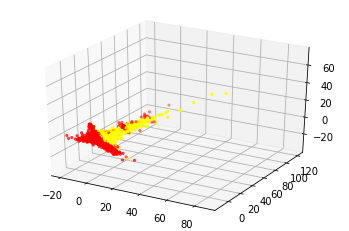

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = plt.axes(projection="3d") 

z_points = X_train0['8'].to_numpy()
x_points =  X_train0['7'].to_numpy()
y_points =  X_train0['9'].to_numpy()
ax.scatter3D(x_points, y_points, z_points, c=y_train0.ans,s=5, cmap='autumn'); 
plt.show()


In [ ]:
7	0.351568
debt_settlement_flag_Y	0.292721
8	0.183127
9	0.091157
20	0.061287
hardship_flag_unknown	0.009495
11	0.004837
0	0.004493
12	0.001314

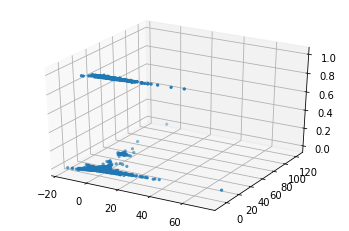

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = plt.axes(projection="3d") 

z_points = X_test['debt_settlement_flag_Y'].to_numpy()
x_points =  X_test['7'].to_numpy()
y_points =  X_test['9'].to_numpy()
ax.scatter3D(x_points, y_points, z_points,s=5, cmap='autumn'); 
plt.show()